# Convolutional Neural Network Classifier 실습 - Keras

## 1. 모듈 불러오기

In [60]:
''' 기본 모듈 및 시각화 모듈 '''
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

''' 데이터 전처리 모듈 '''
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

''' Neural Network - Keras 모듈 '''
import keras

''' 결과 평가용 모듈 '''
from sklearn.metrics import confusion_matrix

## 2. 분석 데이터셋: MNIST Handwritten Digits (다범주 분류 문제)

### MNIST: Modified National Institute of Standards and Technology
![alt text](./pictures/MnistExamples.png "")
<center> <a href='http://yann.lecun.com/exdb/mnist/'> The MNIST Database Hompage </a></center>

### MNIST Data 설명
![alt text](./pictures/Mnist_description.png "")
<center> <a href='http://colah.github.io/posts/2014-10-Visualizing-MNIST/'> http://colah.github.io/posts/2014-10-Visualizing-MNIST/ </a></center><br>
이미지 데이터는 픽셀로 이루어져 있으며, 각 픽셀의 밝기(intensity)를 통해 이미지를 나타낼 수 있다. <br>
MNIST 데이터는 이런 픽셀 값들을 설명변수(X)로 하여 어떤 숫자(Y)에 해당하는 이미지인지 분류하는 문제 <br>
<font color='red'>MNIST 데이터의 이미지는 가로 28 픽셀, 세로 28 픽셀로 이루어져 있으므로 28 x 28 = 784개의 설명변수로 10개의 클래스를 예측하는 다범주 분류문제이다.</font>

## 3. 데이터 전처리

### 데이터 불러오기

In [61]:
dat = pd.read_csv('./data/MNIST_Example.csv')

### 설명변수(X)와 반응변수(Y) 정의

In [62]:
x, y = dat.drop('Y', axis=1), dat['Y']
x, y = np.array(x), np.array(y)

### 반응변수(Y)의 One-Hot Encoding
![alt text](./pictures/OneHotEncoding.png "")

In [63]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [64]:
y


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2.

In [65]:
enc = OneHotEncoder(sparse=False)
y_ = enc.fit_transform(y.reshape(-1, 1))

In [66]:
y_


array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

### 설명변수(X)의 Reshape
![alt text](./pictures/x_reshape.png "") <br>
Convolutional neural network는 이미지 형태로 input을 받기 때문에, 이미지 형태의 가로x세로 형태로 변환이 필요함

In [67]:
x = x.reshape(-1, 28, 28, 1)

In [68]:
x

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

설명변수 X는 (관측치, 가로, 세로, 채널)의 모양을 갖도록 구성됨

In [69]:
print(x.shape)

(1000, 28, 28, 1)


### 학습데이터(Training Dataset)와 검증데이터(Testing Dataset) 분리

In [70]:
train_x, test_x, train_y, test_y = train_test_split(x, y_, stratify=y_, test_size=0.2)

## 4. Convolutional Neural Network 구조 정의
Convolutional Neural Network
![alt text](./pictures/cnn_example_.png "")

<center><a href='http://i-systems.github.io/HSE545/machine%20learning%20all/Workshop/04%20SEC%20Workshop%20-%20CNN.html'>http://i-systems.github.io/HSE545/machine%20learning%20all/Workshop/04%20SEC%20Workshop%20-%20CNN.html</a></center>
<br>
Convolutional Layer

![alt text](https://cdn-images-1.medium.com/max/800/0*qehV5z77wj2cbHBM. "")
<center><a href='https://medium.com/syncedreview/a-guide-to-receptive-field-arithmetic-for-convolutional-neural-networks-42f33d4378e0'> https://medium.com/syncedreview/a-guide-to-receptive-field-arithmetic-for-convolutional-neural-networks-42f33d4378e0</a></center>

Neural Network 모델 정의

In [71]:
model = keras.models.Sequential()

In [72]:
#model.add(keras.layers.Conv2D(5, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.Conv2D(5, padding='same',kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

In [73]:
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

In [74]:
model.add(keras.layers.Conv2D(10, padding='same',kernel_size=(3, 3), activation='relu'))

In [75]:
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

In [76]:
model.add(keras.layers.Flatten())

In [77]:
model.add(keras.layers.Dense(20, activation='relu'))

In [78]:
model.add(keras.layers.Dense(10, activation='softmax'))

모델 구조 확인

In [79]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 5)         50        
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 5)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 10)        460       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 10)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 490)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 20)                9820      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                210       
Total para

모델의 손실함수(loss function) 및 optimizer 정의

In [80]:
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

## 5. Convolutional Neural Network 학습

모델 학습에 필요한 minibatch size와 epoch 정의

In [81]:
batch_size = 200
epochs = 50

In [82]:
history = model.fit(train_x, train_y, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(test_x, test_y))

Train on 800 samples, validate on 200 samples
Epoch 1/50
800/800 [==============================] - 1s 701us/step - loss: 2.3035 - acc: 0.1500 - val_loss: 2.2845 - val_acc: 0.2200
Epoch 2/50
800/800 [==============================] - 0s 265us/step - loss: 2.2741 - acc: 0.2150 - val_loss: 2.2615 - val_acc: 0.2000
Epoch 3/50
800/800 [==============================] - 0s 245us/step - loss: 2.2466 - acc: 0.2225 - val_loss: 2.2355 - val_acc: 0.1950
Epoch 4/50
800/800 [==============================] - 0s 243us/step - loss: 2.2145 - acc: 0.2375 - val_loss: 2.2024 - val_acc: 0.2150
Epoch 5/50
800/800 [==============================] - 0s 229us/step - loss: 2.1752 - acc: 0.2750 - val_loss: 2.1624 - val_acc: 0.2600
Epoch 6/50
800/800 [==============================] - 0s 251us/step - loss: 2.1265 - acc: 0.2950 - val_loss: 2.1145 - val_acc: 0.2850
Epoch 7/50
800/800 [==============================] - 0s 248us/step - loss: 2.0696 - acc: 0.3137 - val_loss: 2.0554 - val_acc: 0.3100
Epoch 8/50
800/8

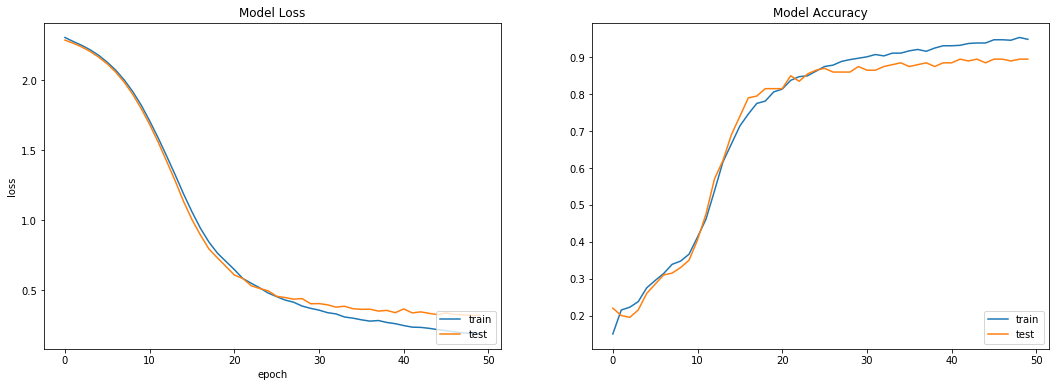

In [83]:
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'],loc='lower right')

plt.subplot(122)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.legend(['train','test'],loc='lower right')

### Training Data Confusion Matrix

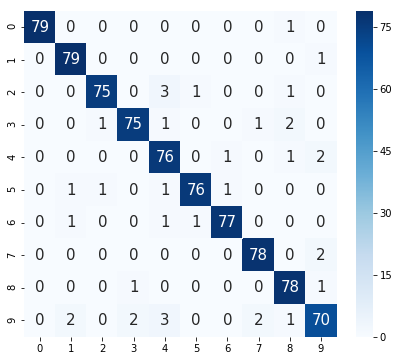

In [84]:
train_y_pred = model.predict(train_x)
train_y_label = np.argmax(train_y, axis=1)
train_y_pred_label = np.argmax(train_y_pred, axis=1)
cm_train = confusion_matrix(train_y_label, train_y_pred_label)
cm_train = pd.DataFrame(cm_train, columns=np.arange(10), index=np.arange(10))
plt.figure(figsize=(7, 6))
sns.heatmap(data=cm_train, annot=True, fmt='d', annot_kws={'size': 15}, cmap='Blues')

### Testing Data Confusion Matrix

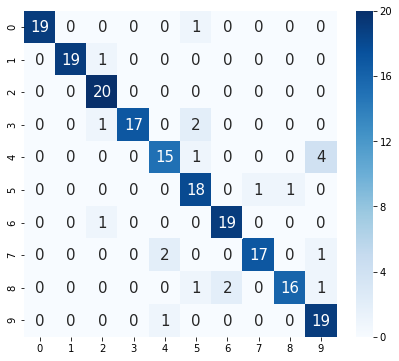

In [85]:
test_y_pred = model.predict(test_x)
test_y_label = np.argmax(test_y, axis=1)
test_y_pred_label = np.argmax(test_y_pred, axis=1)
cm_test = confusion_matrix(test_y_label, test_y_pred_label)
cm_test = pd.DataFrame(cm_test, columns=np.arange(10), index=np.arange(10))
plt.figure(figsize=(7, 6))
sns.heatmap(data=cm_test, annot=True, fmt='d', annot_kws={'size': 15}, cmap='Blues')

## 6. Dense Neural Network와 비교

### Model Parameters
![alt text](./pictures/model_summary.png "")

### Testing Confusion Matrix
![alt text](./pictures/test_cm.png "")